In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns


In [2]:
RAW_DATA_DIR = "../data/raw"
classes = [c for c in os.listdir(RAW_DATA_DIR)
           if os.path.isdir(os.path.join(RAW_DATA_DIR, c))]
classes


['F4', 'F3', 'F2', 'F0', 'F1']

## Count Images per Class (Check class imbalance)

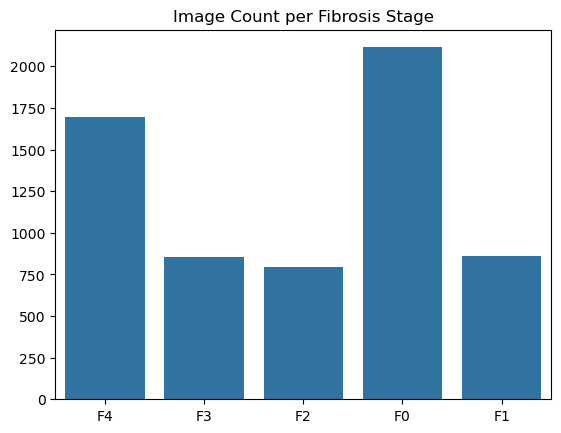

In [3]:
counts = {c: len(os.listdir(os.path.join(RAW_DATA_DIR, c))) for c in classes}
counts
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Image Count per Fibrosis Stage")
plt.show()


##  Visualize Sample Images

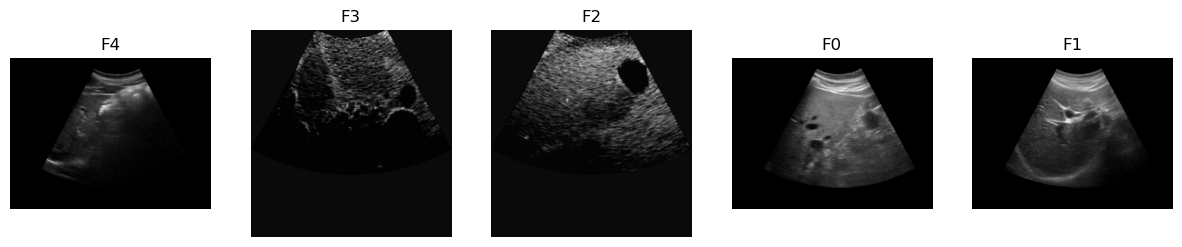

In [4]:
import random

plt.figure(figsize=(15,8))
for i, c in enumerate(classes):
    img_name = random.choice(os.listdir(os.path.join(RAW_DATA_DIR, c)))
    img = Image.open(os.path.join(RAW_DATA_DIR, c, img_name))

    plt.subplot(1, len(classes), i+1)
    plt.imshow(img, cmap="gray")
    plt.title(c)
    plt.axis("off")
plt.show()


## Check if Image Shapes are Consistent

In [5]:
shapes = []

for c in classes:
    class_path = os.path.join(RAW_DATA_DIR, c)
    for img_name in os.listdir(class_path):
        img = Image.open(os.path.join(class_path, img_name))
        shapes.append(img.size)

shapes[:10]


[(640, 480),
 (640, 480),
 (449, 464),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480)]

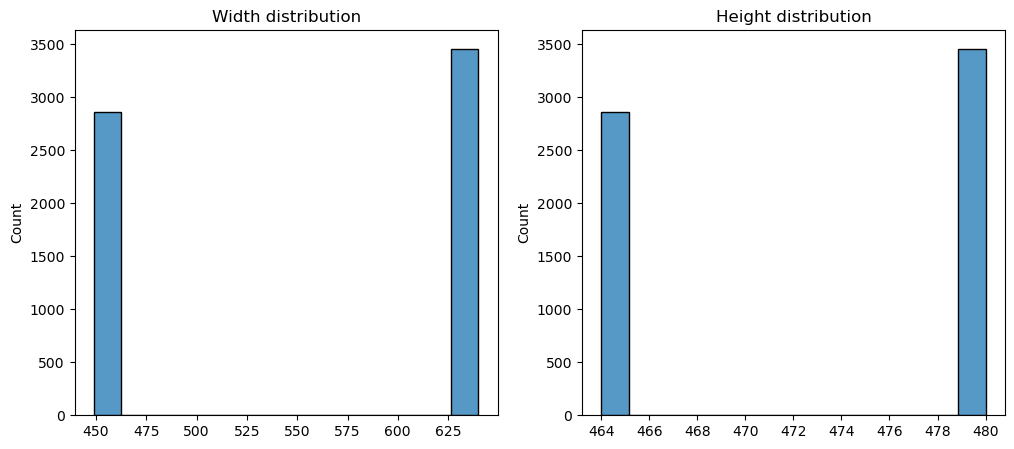

In [6]:
widths = [s[0] for s in shapes]
heights = [s[1] for s in shapes]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(widths)
plt.title("Width distribution")

plt.subplot(1,2,2)
sns.histplot(heights)
plt.title("Height distribution")
plt.show()


## Check for Corrupt or Invalid Images

In [7]:
broken = []
for c in classes:
    folder = os.path.join(RAW_DATA_DIR, c)
    for img_name in os.listdir(folder):
        path = os.path.join(folder, img_name)

        # Skip hidden/system files
        if img_name.startswith('.'):
            continue

        try:
            img = Image.open(path)
            img.load()   # <-- fully decode image
        except Exception as e:
            broken.append((c, img_name, str(e)))

broken

"""catches: truncated JPEGs, corrupted PNGs, unreadable formats, empty files, files PIL only partially recognizes"""


'catches: truncated JPEGs, corrupted PNGs, unreadable formats, empty files, files PIL only partially recognizes'

## Brightness / Contrast Stats

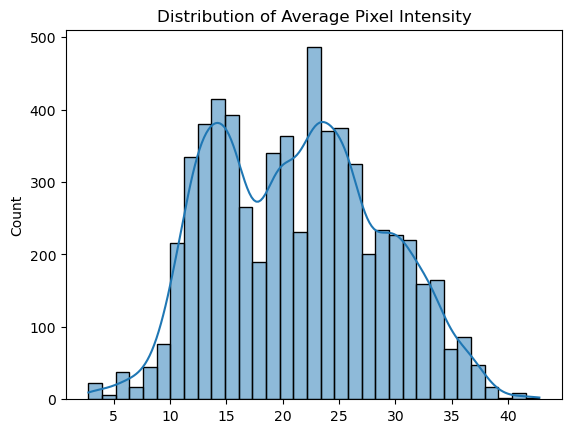

In [8]:
means = []
for c in classes:
    for img_name in os.listdir(os.path.join(RAW_DATA_DIR, c)):
        img = np.array(Image.open(os.path.join(RAW_DATA_DIR, c, img_name)).convert("L"))
        means.append(img.mean())

sns.histplot(means, kde=True)
plt.title("Distribution of Average Pixel Intensity")
plt.show()
